## Top 100 das Faixas do Youtube Brasil entre 2022 e 2023
---

**Objetivo:** Analisar as relações entre do rankeamento das Top 100 faixas do youtube entre os dias 07/02/2022 a 02/06/2023. 

---


### Imports and libs
---

In [506]:
#Connection of google API
from googleapiclient.discovery import build
from APIKEY import APIKEY

# webscrapping and os manipulation
from selenium import webdriver 
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import os

#Data manipulation
import pandas as pd
import numpy as np 

# time
from datetime import time, timedelta, datetime
from time import sleep
import tqdm

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

## 1º - Extração da Base de Dados 
---

Nessa etapa, busca-se extrair o rankeamento feito pela Youtube Brasil [link do top100 semanal](https://charts.youtube.com/charts/TopSongs/br/20230609-20230615?hl=pt) levando em consideração o período mencionado. Para tanto, será utilizado algumas bibliotecas para baixar automaticamente os arquivos que já estão em csv.  

In [227]:
"""Essa função retorna uma lista com os intervalos de data que aparecem na url do youtube charts"""

def intervaloBusca(data_inicio, data_fim):
    #cria um array vazio
    datas = []
    
    # menor data possivel para fazer o laço 
    data_fim_temp = date(1,1,1)
    
    while data_fim_temp < data_fim:
        # cria a data final do intervalo que aparece na charts
        data_fim_temp = data_inicio + timedelta(6)
        
        # cria o intervalo data-inicio e data-fim no formato da url de busca
        intervalo = str(data_inicio).replace('-', '') + '-' + str(data_fim_temp).replace('-', '')
        
        # acrescenta no array vazio o intervalo de datas 
        datas.append(intervalo)
        
        # cria a data_inicio da próxima semana 
        data_inicio = data_fim_temp + timedelta(1)
    return datas

In [228]:
"""Essa função baixa as bases do site https://charts.youtube.com/charts/TopSongs/br/20230609-20230615?hl=pt com base na data"""
def baixaBases(datas):
    for i in datas:      
        # url que será acessada
        url = f"https://charts.youtube.com/charts/TopSongs/br/{i}?hl=pt"
        
        # instanciando o navegador Chrome
        driver = webdriver.Chrome()
        
        #abrindo a url 
        driver.get(url)
        
        sleep(15)
        
        # caminho do botão de download
        path = """//div[@class='menu-right style-scope ytmc-charts']//div[@class='download-container style-scope ytmc-charts']//iron-icon[@class='style-scope paper-icon-button']"""
        
        # procurando o botão e clicando nele 
        driver.find_element(By.XPATH, path).click()
        
        # fechando o navegador
        driver.quit()
        
        sleep(15)
    return "fim!"

In [229]:
datas = intervaloBusca(date(2022,2,4), date(2023,6,8))

In [230]:
%%time
baixaBases(datas)

Wall time: 46min 54s


'fim!'

In [267]:
os.listdir()[3:-1]

['youtube-charts-top-songs-br-weekly-2022-02-10.csv',
 'youtube-charts-top-songs-br-weekly-2022-02-17.csv',
 'youtube-charts-top-songs-br-weekly-2022-02-24.csv',
 'youtube-charts-top-songs-br-weekly-2022-03-10.csv',
 'youtube-charts-top-songs-br-weekly-2022-03-17.csv',
 'youtube-charts-top-songs-br-weekly-2022-03-24.csv',
 'youtube-charts-top-songs-br-weekly-2022-03-31.csv',
 'youtube-charts-top-songs-br-weekly-2022-04-07.csv',
 'youtube-charts-top-songs-br-weekly-2022-04-14.csv',
 'youtube-charts-top-songs-br-weekly-2022-04-21.csv',
 'youtube-charts-top-songs-br-weekly-2022-04-28.csv',
 'youtube-charts-top-songs-br-weekly-2022-05-05.csv',
 'youtube-charts-top-songs-br-weekly-2022-05-12.csv',
 'youtube-charts-top-songs-br-weekly-2022-05-19.csv',
 'youtube-charts-top-songs-br-weekly-2022-05-26.csv',
 'youtube-charts-top-songs-br-weekly-2022-06-30.csv',
 'youtube-charts-top-songs-br-weekly-2022-07-07.csv',
 'youtube-charts-top-songs-br-weekly-2022-07-14.csv',
 'youtube-charts-top-songs-b

In [264]:
"""unindo as bases em um unico arquivo e acrescentando a coluna Weekly para guardar a origem."""

df = pd.DataFrame()
for i in os.listdir()[3:-1]:
    df_temp = pd.read_csv(i)
    df_temp['Weekly'] =  i[-12:-4]
    df = pd.concat([df,df_temp])

In [268]:
df.head()

,Rank,Previous Rank,Track Name,Artist Names,Weeks on Chart,Views,Weekly Growth,YouTube URL,Weekly
0,1,1.0,Malvada,Zé Felipe,2,21185310,9.8%,https://www.youtube.com/watch?v=r0mNwyywHIY,22-02-10
1,2,2.0,Malvadão 3,Xamã,8,17063733,-3.7%,https://www.youtube.com/watch?v=i9NOkjmBszo,22-02-10
2,3,3.0,Depende,Dj Guuga,8,11911917,8.7%,https://www.youtube.com/watch?v=v9geHIUOxeA,22-02-10
3,4,4.0,Vontade De Morder,Simone & Simaria & Zé Felipe,4,11243771,3.4%,https://www.youtube.com/watch?v=bgf18kANm_k,22-02-10
4,5,6.0,Mal Feito (Ao Vivo),Hugo & Guilherme & Marília Mendonça,4,9643194,-5.6%,https://www.youtube.com/watch?v=kyfXEMqvLgU,22-02-10


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            5200 non-null   int64  
 1   Previous Rank   4394 non-null   float64
 2   Track Name      5200 non-null   object 
 3   Artist Names    5200 non-null   object 
 4   Weeks on Chart  5200 non-null   int64  
 5   Views           5200 non-null   int64  
 6   Weekly Growth   4394 non-null   object 
 7   YouTube URL     5200 non-null   object 
 8   Weekly          5200 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 406.2+ KB


In [ ]:
#criação da coluna video_id para facilitar a busca da próxima etapa.
df['Video_id'] = df['YouTube URL'].apply(lambda x: x.split('=')[1]) 

In [389]:
df.head()

,Rank,Previous Rank,Track Name,Artist Names,Weeks on Chart,Views,Weekly Growth,YouTube URL,Weekly,Video_id
0,1,1.0,Malvada,Zé Felipe,2,21185310,9.8%,https://www.youtube.com/watch?v=r0mNwyywHIY,22-02-10,r0mNwyywHIY
1,2,2.0,Malvadão 3,Xamã,8,17063733,-3.7%,https://www.youtube.com/watch?v=i9NOkjmBszo,22-02-10,i9NOkjmBszo
2,3,3.0,Depende,Dj Guuga,8,11911917,8.7%,https://www.youtube.com/watch?v=v9geHIUOxeA,22-02-10,v9geHIUOxeA
3,4,4.0,Vontade De Morder,Simone & Simaria & Zé Felipe,4,11243771,3.4%,https://www.youtube.com/watch?v=bgf18kANm_k,22-02-10,bgf18kANm_k
4,5,6.0,Mal Feito (Ao Vivo),Hugo & Guilherme & Marília Mendonça,4,9643194,-5.6%,https://www.youtube.com/watch?v=kyfXEMqvLgU,22-02-10,kyfXEMqvLgU


## 2º - Extração das características dos Vídeos 
---

Nessa etapa, busca-se extrair a data de publicação dos vídeos. Para tanto, será utilizado a API do Youtube cuja chave da API foi gerada utilizando a Google Cloud.  

In [439]:
def consultaAPI(video_id):
    #instaciando e autenticando
    youtube = build('youtube', 'v3', developerKey=APIKEY)
    resposta = youtube.videos().list(part='snippet', id = str(video_id)).execute()
    if len(resposta['items']) > 0:
        data_lancamento = resposta['items'][0]['snippet']['publishedAt']
        #date_object = datetime.datetime.strptime(data_lancamento, "%Y-%m-%dT%H:%M:%SZ")
        #data_lancamento = pd.to_datetime(date_object, format="%Y.%m.%d")
        return data_lancamento  

In [440]:
df['publishedAt'] = df['Video_id'].apply(lambda x: consultaAPI(x))

In [529]:
df.head()

,Rank,Previous Rank,Track Name,Artist Names,Weeks on Chart,Views,Weekly Growth,YouTube URL,Weekly,Video_id,publishedAt
0,1,1.0,Malvada,Zé Felipe,2,21185310,9.8%,https://www.youtube.com/watch?v=r0mNwyywHIY,22-02-10,r0mNwyywHIY,2022-01-28 15:00:12
1,2,2.0,Malvadão 3,Xamã,8,17063733,-3.7%,https://www.youtube.com/watch?v=i9NOkjmBszo,22-02-10,i9NOkjmBszo,2021-11-30 15:00:10
2,3,3.0,Depende,Dj Guuga,8,11911917,8.7%,https://www.youtube.com/watch?v=v9geHIUOxeA,22-02-10,v9geHIUOxeA,2022-01-21 15:00:38
3,4,4.0,Vontade De Morder,Simone & Simaria & Zé Felipe,4,11243771,3.4%,https://www.youtube.com/watch?v=bgf18kANm_k,22-02-10,bgf18kANm_k,2022-01-14 14:01:12
4,5,6.0,Mal Feito (Ao Vivo),Hugo & Guilherme & Marília Mendonça,4,9643194,-5.6%,https://www.youtube.com/watch?v=kyfXEMqvLgU,22-02-10,kyfXEMqvLgU,2022-01-14 15:00:10


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            5200 non-null   int64  
 1   Previous Rank   4394 non-null   float64
 2   Track Name      5200 non-null   object 
 3   Artist Names    5200 non-null   object 
 4   Weeks on Chart  5200 non-null   int64  
 5   Views           5200 non-null   int64  
 6   Weekly Growth   4394 non-null   object 
 7   YouTube URL     5200 non-null   object 
 8   Weekly          5200 non-null   object 
 9   Video_id        5200 non-null   object 
 10  publishedAt     5143 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 616.5+ KB


In [457]:
#verificando os casos em que a data de publicação veio nula
df[df.publishedAt.isnull()]

,Rank,Previous Rank,Track Name,Artist Names,Weeks on Chart,Views,Weekly Growth,YouTube URL,Weekly,Video_id,publishedAt
68,69,58.0,Ela me Falou Que Quer Rave,"MC LEVIN, DJ Nikolas Alves Exclusive, Dj Kaiok...",16,2222839,-7.2%,https://www.youtube.com/watch?v=,22-02-10,,None
73,74,69.0,Ela me Falou Que Quer Rave,"MC LEVIN, DJ Nikolas Alves Exclusive, Dj Kaiok...",17,2017169,-9.3%,https://www.youtube.com/watch?v=,22-02-17,,None
88,89,74.0,Ela me Falou Que Quer Rave,"MC LEVIN, DJ Nikolas Alves Exclusive, Dj Kaiok...",18,1874872,-7.1%,https://www.youtube.com/watch?v=,22-02-24,,None
73,74,83.0,Ela me Falou Que Quer Rave,"MC LEVIN, DJ Nikolas Alves Exclusive, Dj Kaiok...",20,1777134,-10.7%,https://www.youtube.com/watch?v=,22-03-10,,None
48,49,NaN,Bagulho Louco,Mc Paiva ZS,1,2641565,NaN,https://www.youtube.com/watch?v=,22-05-05,,None
51,52,49.0,Bagulho Louco,Mc Paiva ZS,2,2488913,-5.8%,https://www.youtube.com/watch?v=,22-05-12,,None
48,49,52.0,Bagulho Louco,Mc Paiva ZS,3,2464450,-1%,https://www.youtube.com/watch?v=,22-05-19,,None
89,90,NaN,Olho no Olho Coraçao Acelera,Michel Villar,1,1351071,NaN,https://www.youtube.com/watch?v=,22-05-19,,None
39,40,49.0,Bagulho Louco,Mc Paiva ZS,4,2974383,20.7%,https://www.youtube.com/watch?v=,22-05-26,,None
54,55,66.0,Bagulho Louco,Mc Paiva ZS,9,2651281,12.7%,https://www.youtube.com/watch?v=,22-06-30,,None


 #### Obs!!! Ao verificar alguns desses casos de data de publicação nulo no site(charts), reparei que esses casos nulos são de vídeos que foram removidos! 

In [525]:
def convertendoDatas(data):
    if data != None:
        data = datetime.strptime(str(data), "%Y-%m-%dT%H:%M:%SZ")
        return data

In [526]:
df['publishedAt'] = df['publishedAt'].apply(lambda x: convertendoDatas(x))

In [528]:
df.head()

,Rank,Previous Rank,Track Name,Artist Names,Weeks on Chart,Views,Weekly Growth,YouTube URL,Weekly,Video_id,publishedAt
0,1,1.0,Malvada,Zé Felipe,2,21185310,9.8%,https://www.youtube.com/watch?v=r0mNwyywHIY,22-02-10,r0mNwyywHIY,2022-01-28 15:00:12
1,2,2.0,Malvadão 3,Xamã,8,17063733,-3.7%,https://www.youtube.com/watch?v=i9NOkjmBszo,22-02-10,i9NOkjmBszo,2021-11-30 15:00:10
2,3,3.0,Depende,Dj Guuga,8,11911917,8.7%,https://www.youtube.com/watch?v=v9geHIUOxeA,22-02-10,v9geHIUOxeA,2022-01-21 15:00:38
3,4,4.0,Vontade De Morder,Simone & Simaria & Zé Felipe,4,11243771,3.4%,https://www.youtube.com/watch?v=bgf18kANm_k,22-02-10,bgf18kANm_k,2022-01-14 14:01:12
4,5,6.0,Mal Feito (Ao Vivo),Hugo & Guilherme & Marília Mendonça,4,9643194,-5.6%,https://www.youtube.com/watch?v=kyfXEMqvLgU,22-02-10,kyfXEMqvLgU,2022-01-14 15:00:10


<AxesSubplot:>

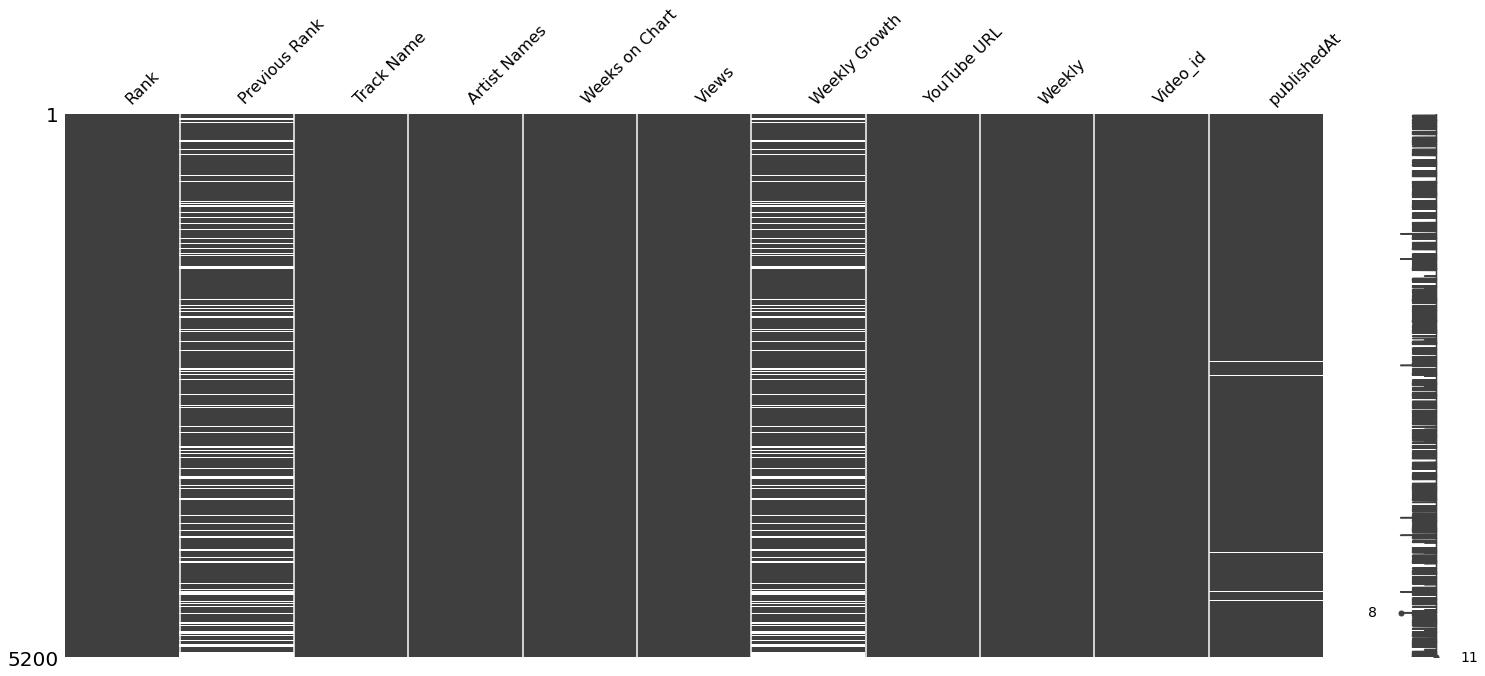

In [530]:
# analisando a distribuição de nulos
msno.matrix(df)

In [591]:
def convertendoDatas2(data):
    if data != None:
        data = datetime.strptime(str(data), "%y-%m-%d")
        return data

In [592]:
df.Weekly = df.Weekly.apply(lambda x: convertendoDatas2(x))

## 3º - Classificações
---

- Catálogo/Frontline: As faixas com menos de 42 meses de lançamento são consideradas Frontline e as faixas com 42 meses ou mais são consideradas Catálogo.

In [570]:
def classifica(publishedAt):
    if publishedAt != None:
        meses = ((datetime.now() - publishedAt).days)//30
        if meses < 42:
            return 'Frontline'
        else:
            return 'Catálogo'

In [571]:
df['Classification'] = df['publishedAt'].apply(lambda x: classifica(x))

In [572]:
df

,Rank,Previous Rank,Track Name,Artist Names,Weeks on Chart,Views,Weekly Growth,YouTube URL,Weekly,Video_id,publishedAt,Classification
0,1,1.0,Malvada,Zé Felipe,2,21185310,9.8%,https://www.youtube.com/watch?v=r0mNwyywHIY,22-02-10,r0mNwyywHIY,2022-01-28 15:00:12,Frontline
1,2,2.0,Malvadão 3,Xamã,8,17063733,-3.7%,https://www.youtube.com/watch?v=i9NOkjmBszo,22-02-10,i9NOkjmBszo,2021-11-30 15:00:10,Frontline
2,3,3.0,Depende,Dj Guuga,8,11911917,8.7%,https://www.youtube.com/watch?v=v9geHIUOxeA,22-02-10,v9geHIUOxeA,2022-01-21 15:00:38,Frontline
3,4,4.0,Vontade De Morder,Simone & Simaria & Zé Felipe,4,11243771,3.4%,https://www.youtube.com/watch?v=bgf18kANm_k,22-02-10,bgf18kANm_k,2022-01-14 14:01:12,Frontline
4,5,6.0,Mal Feito (Ao Vivo),Hugo & Guilherme & Marília Mendonça,4,9643194,-5.6%,https://www.youtube.com/watch?v=kyfXEMqvLgU,22-02-10,kyfXEMqvLgU,2022-01-14 15:00:10,Frontline
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,NaN,Doutora 3,Mc Kevin & Perera Dj,28,1630980,NaN,https://www.youtube.com/watch?v=6UQHIQpBw6w,23-06-08,6UQHIQpBw6w,2021-03-31 22:28:55,Frontline
96,97,NaN,Feirão dos 23 (feat. Babidi & LB Único),"Raflow, Chefin & Distrito 23",1,1625699,NaN,https://www.youtube.com/watch?v=0yPQnBG0hzQ,23-06-08,0yPQnBG0hzQ,2023-04-28 21:00:10,Frontline
97,98,97.0,Set Do Manoel,"Mc Lipi , MC Paulin da Capital, MC Marks, Dj G...",3,1622588,3.4%,https://www.youtube.com/watch?v=Cn_ltkG_QpA,23-06-08,Cn_ltkG_QpA,2023-04-20 18:00:11,Frontline
98,99,74.0,Cuidado,Nadson O Ferinha,2,1618174,-18.6%,https://www.youtube.com/watch?v=gxEHxtFRTOk,23-06-08,gxEHxtFRTOk,2023-02-26 15:06:19,Frontline


## 4º - Questionamentos 
---

1. Qual o artista que mais teve faixas no Top 100 ao longo desses anos?
2. Qual a posição mais alta que uma faixa atingiu na semana de seu lançamento? E qual foi a faixa?
3. Qual o ano teve o maior número de views no chart? E qual foi sua taxa de crescimento em relação ao ano anterior?
4. Existe alguma tendência de crescimento ou queda do frontline no chart ao longo dos anos?
5. Nossa impressão é que o tempo que as faixas permanecem no chart está diminuindo e com isso, mais faixas diferentes estão passando pelo chart. Com os dados extraídos, é possível comprovar essa afirmativa?


In [573]:
df['Artist Names'].value_counts()

Henrique & Juliano              192
Gusttavo Lima                   166
Mari Fernandez                   81
Ana Castela                      65
Jorge & Mateus                   54
                               ... 
Luiza Martins & Murilo Huff       1
Melanie Martinez                  1
Guilherme & Santiago              1
Michel Villar                     1
Raflow, Chefin & Distrito 23      1
Name: Artist Names, Length: 549, dtype: int64

#### R_1:. Henrique & Juliano foram os artista que mais apareceram no Top 100 ao longo desses anos. 

In [578]:
df.loc[df.Views == df.Views.max()]

,Rank,Previous Rank,Track Name,Artist Names,Weeks on Chart,Views,Weekly Growth,YouTube URL,Weekly,Video_id,publishedAt,Classification
0,1,1.0,Zona De Perigo,Léo Santana,3,28987018,22.7%,https://www.youtube.com/watch?v=0cnUcoXllMM,23-02-16,0cnUcoXllMM,2022-12-19 22:21:35,Frontline


In [595]:
df.loc[df['Track Name'] == 'Sentadona (Remix)']

,Rank,Previous Rank,Track Name,Artist Names,Weeks on Chart,Views,Weekly Growth,YouTube URL,Weekly,Video_id,publishedAt,Classification
30,31,61.0,Sentadona (Remix),"Davi Kneip, Mc Frog, Dj Gabriel do Borel & Luí...",2,3602394,28.8%,https://www.youtube.com/watch?v=VKaLjHZJ-GY,2022-03-10,VKaLjHZJ-GY,2022-03-18 14:01:02,Frontline
24,25,31.0,Sentadona (Remix),"Davi Kneip, Mc Frog, Dj Gabriel do Borel & Luí...",3,4426378,22.9%,https://www.youtube.com/watch?v=VKaLjHZJ-GY,2022-03-17,VKaLjHZJ-GY,2022-03-18 14:01:02,Frontline
0,1,25.0,Sentadona (Remix),"Davi Kneip, Mc Frog, Dj Gabriel do Borel & Luí...",4,15102012,241.2%,https://www.youtube.com/watch?v=VKaLjHZJ-GY,2022-03-24,VKaLjHZJ-GY,2022-03-18 14:01:02,Frontline
0,1,1.0,Sentadona (Remix),"Davi Kneip, Mc Frog, Dj Gabriel do Borel & Luí...",5,13266270,-12.2%,https://www.youtube.com/watch?v=VKaLjHZJ-GY,2022-03-31,VKaLjHZJ-GY,2022-03-18 14:01:02,Frontline
0,1,1.0,Sentadona (Remix),"Davi Kneip, Mc Frog, Dj Gabriel do Borel & Luí...",6,12329291,-7.1%,https://www.youtube.com/watch?v=VKaLjHZJ-GY,2022-04-07,VKaLjHZJ-GY,2022-03-18 14:01:02,Frontline
0,1,1.0,Sentadona (Remix),"Davi Kneip, Mc Frog, Dj Gabriel do Borel & Luí...",7,12837114,4.1%,https://www.youtube.com/watch?v=VKaLjHZJ-GY,2022-04-14,VKaLjHZJ-GY,2022-03-18 14:01:02,Frontline
0,1,1.0,Sentadona (Remix),"Davi Kneip, Mc Frog, Dj Gabriel do Borel & Luí...",8,11103100,-13.5%,https://www.youtube.com/watch?v=VKaLjHZJ-GY,2022-04-21,VKaLjHZJ-GY,2022-03-18 14:01:02,Frontline
1,2,1.0,Sentadona (Remix),"Davi Kneip, Mc Frog, Dj Gabriel do Borel & Luí...",9,9600099,-13.5%,https://www.youtube.com/watch?v=VKaLjHZJ-GY,2022-04-28,VKaLjHZJ-GY,2022-03-18 14:01:02,Frontline
4,5,2.0,Sentadona (Remix),"Davi Kneip, Mc Frog, Dj Gabriel do Borel & Luí...",10,8030721,-16.3%,https://www.youtube.com/watch?v=VKaLjHZJ-GY,2022-05-05,VKaLjHZJ-GY,2022-03-18 14:01:02,Frontline
5,6,5.0,Sentadona (Remix),"Davi Kneip, Mc Frog, Dj Gabriel do Borel & Luí...",11,6655669,-17.1%,https://www.youtube.com/watch?v=VKaLjHZJ-GY,2022-05-12,VKaLjHZJ-GY,2022-03-18 14:01:02,Frontline


In [597]:
df.loc[df['Track Name'] == 'Sentadona (Remix)']['Artist Names'][30]

'Davi Kneip, Mc Frog, Dj Gabriel do Borel & Luísa Sonza'

### A partir desse ponto utilizei a base abaixo no tableau para os cálculos e análises. 

In [ ]:
df.to_csv('youtube-charts-top-songs-br-weekly-2022-02-04a2023-06-08.csv', sep=",")